In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import scipy.ndimage
import random
random.seed(1)

In [2]:
main = "/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/"
path_500M = main + "4_4_shifted_ATAC_09.16.2021_subsample_500M/with_gm12878_bias_final_model/unplug/deepshap/"
path_100M = main + "4_4_shifted_ATAC_09.16.2021_subsample_100M/with_gm12878_bias_final_model/unplug/deepshap/"
path_25M = main + "4_4_shifted_ATAC_09.16.2021_subsample_25M/with_gm12878_bias_final_model/unplug/deepshap/"
path_5M = main + "4_4_shifted_ATAC_09.16.2021_subsample_5M/with_gm12878_bias_final_model/unplug/deepshap/"

data_500M = pkl.load(open(path_500M+"20K.fold0.deepSHAP", "rb"))
data_100M = pkl.load(open(path_100M+"20K.fold0.deepSHAP", "rb"))
data_25M = pkl.load(open(path_25M+"20K.fold0.deepSHAP", "rb"))
data_5M = pkl.load(open(path_5M+"20K.fold0.deepSHAP", "rb"))

In [3]:
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import scipy.ndimage
def get_pairwise_metrics(array_1, array_2, type_key, input_keys=None, smoothing_flag=False):
  
    pearsonr_corr=[]
    pearsonr_random=[]
    
    spearmanr_corr=[]
    spearmanr_random=[]
    jsd_corr=[]
    jsd_random=[]
    jsd_random1=[]   
    
    if input_keys==None:
        input_keys=array_2["seq"].keys()
        
    for region in input_keys:
        if "shap" in type_key:
            array_1_sig = array_1[type_key][region]*array_1["seq"][region]
            array_2_sig = array_2[type_key][region]*array_2["seq"][region]
            
            array_1_sig = np.sum(array_1_sig,axis=1)
            array_2_sig = np.sum(array_2_sig,axis=1)
        else:
            array_1_sig = array_1[type_key][region]
            array_2_sig = array_2[type_key][region]

        array_1_sig = np.abs(array_1_sig)+1e-10
        array_2_sig = np.abs(array_2_sig)+1e-10
            
        array_1_sig = array_1_sig / np.sum(array_1_sig)
        array_2_sig = array_2_sig / np.sum(array_2_sig)
        
        if smoothing_flag:
            array_1_sig = scipy.ndimage.gaussian_filter1d(array_1_sig, 7, truncate=(80 / 14))
            array_2_sig = scipy.ndimage.gaussian_filter1d(array_2_sig, 7, truncate=(80 / 14))

        rnd_array_2_sig = np.random.permutation(array_2_sig)
        rnd_region = random.sample(input_keys,1)
        
        while rnd_region == region:
            rnd_region = random.sample(input_keys,1) 
        #print(rnd_region[0])
        rnd_region=rnd_region[0]
        if "shap" in type_key:
            rnd_reg_array_2_sig = array_2[type_key][rnd_region]*array_2["seq"][rnd_region]
            rnd_reg_array_2_sig = np.sum(rnd_reg_array_2_sig,axis=1)
        else:
            rnd_reg_array_2_sig = array_2[type_key][rnd_region]
            
        rnd_reg_array_2_sig = np.abs(rnd_reg_array_2_sig)+1e-10
        rnd_reg_array_2_sig = rnd_reg_array_2_sig / np.sum(rnd_reg_array_2_sig)
        if smoothing_flag:
            rnd_reg_array_2_sig = scipy.ndimage.gaussian_filter1d(rnd_reg_array_2_sig, 7, truncate=(80 / 14))


        pearsonr_corr.append(pearsonr(array_1_sig, array_2_sig)[0])
        pearsonr_random.append(pearsonr(array_1_sig, rnd_reg_array_2_sig)[0])

        spearmanr_corr.append(spearmanr(array_1_sig, array_2_sig)[0])
        spearmanr_random.append(spearmanr(array_1_sig, rnd_reg_array_2_sig)[0])
        
        jsd_corr.append(jensenshannon(array_1_sig, array_2_sig, 2.0))
        jsd_random.append(jensenshannon(array_1_sig, rnd_reg_array_2_sig, 2.0))
        jsd_random1.append(jensenshannon(array_1_sig, rnd_array_2_sig, 2.0))
    
    print(sum(np.isnan(pearsonr_corr)))
    print(sum(np.isnan(pearsonr_random)))
    print(sum(np.isnan(spearmanr_corr)))
    print(sum(np.isnan(spearmanr_random)))
    print(sum(np.isnan(jsd_corr)))
    print(sum(np.isnan(jsd_random)))
    print(sum(np.isnan(jsd_random1)))
        
    print("mean pearsonr",np.mean(pearsonr_corr), np.std(pearsonr_corr))
    print("random mean pearsonr",np.mean(pearsonr_random), np.std(pearsonr_random))

    print("mean spearmanr",np.mean(spearmanr_corr), np.std(spearmanr_corr))
    print("random mean spearmanr",np.mean(spearmanr_random), np.std(spearmanr_random))

    print("mean jsd",np.mean(jsd_corr), np.std(jsd_corr))
    print("random (perturb) mean jsd",np.mean(jsd_random), np.std(jsd_random))
    print("random (region) mean jsd",np.mean(jsd_random1), np.std(jsd_random1))

    return pearsonr_corr, pearsonr_random, spearmanr_corr, spearmanr_random, jsd_corr, jsd_random, input_keys, jsd_random1
    

input_key_list=data_500M["seq"].keys()       

In [6]:
count_shap_pearsonr_corr, count_shap_pearsonr_random, count_shap_spearmanr_corr, count_shap_spearmanr_random, count_shap_jsd_corr, count_shap_jsd_random, count_shap_key_list, count_shap_jsd_random_1 = get_pairwise_metrics(data_100M, data_500M, type_key="count_shap", input_keys=input_key_list, smoothing_flag=False)

0
0
0
0
0
0
0
mean pearsonr 0.7390331680337805 0.14814353273412456
random mean pearsonr 0.21479603399324998 0.11889867262812831
mean spearmanr 0.656328350063709 0.051398468740063534
random mean spearmanr 0.5322169373291328 0.06382329624392047
mean jsd 0.361458022371668 0.042619792714823135
random (perturb) mean jsd 0.49126906105261114 0.054856123442148345
random (region) mean jsd 0.6678760252538964 0.04881837707515587


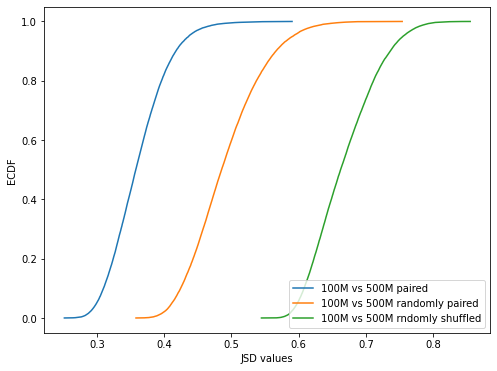

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF


plt.figure(figsize=(8, 6))
ecdf = ECDF(count_shap_jsd_corr)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M paired")
ecdf = ECDF(count_shap_jsd_random)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M randomly paired")
ecdf = ECDF(count_shap_jsd_random_1)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M randomly shuffled")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

In [9]:
prof_shap_pearsonr_corr, prof_shap_pearsonr_random, prof_shap_spearmanr_corr, prof_shap_spearmanr_random, prof_shap_jsd_corr, prof_shap_jsd_random, prof_shap_key_list, prof_shap_jsd_random_1 = get_pairwise_metrics(data_100M, data_500M, type_key="profile_shap", input_keys=input_key_list, smoothing_flag=False)

0
0
0
0
0
0
0
mean pearsonr 0.8590956417494496 0.1212157703255658
random mean pearsonr 0.2208508099052053 0.16486416917230257
mean spearmanr 0.8210374150823537 0.039580709584458175
random mean spearmanr 0.7403530382604451 0.047407940506832495
mean jsd 0.3027779122104339 0.061661684312999114
random (perturb) mean jsd 0.553371051027358 0.08316610276859919
random (region) mean jsd 0.768381251347105 0.046678479295771576


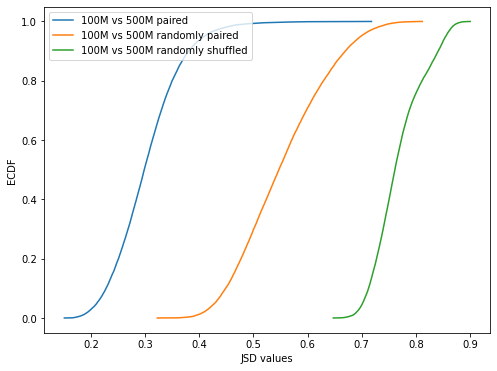

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF


plt.figure(figsize=(8, 6))
ecdf = ECDF(prof_shap_jsd_corr)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M paired")
ecdf = ECDF(prof_shap_jsd_random)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M randomly paired")
ecdf = ECDF(prof_shap_jsd_random_1)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M randomly shuffled")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()